In [3]:
import train_config
from matplotlib import pyplot as plt
import os
import gc
import torch
import json
from train import begin_trianing

In [2]:
args = train_config.get_args()
print (json.dumps(args, indent=2, default=str))
# print(args)

{
  "cuda": true,
  "save": true,
  "save_dir": "./exp_multimodal",
  "resume_path": "./exp_multimodal/checkpoint.pth",
  "color_map": {
    "0": [
      0,
      0,
      0
    ],
    "1": [
      21,
      176,
      26
    ],
    "2": [
      5,
      73,
      7
    ],
    "3": [
      170,
      166,
      98
    ],
    "4": [
      229,
      0,
      0
    ],
    "5": [
      140,
      0,
      15
    ]
  },
  "num_class": 5,
  "train_dataset": {
    "name": "H2giga",
    "kwargs": {
      "root_dir": "../Data/H2giga",
      "type": "train",
      "class_id": null,
      "size": null,
      "normalize": true,
      "transform": "Compose(\n    RandomRotationsAndFlips(degrees=[-90.0, 90.0], interpolation=nearest, expand=False, fill=0)\n    <utils.transforms.ToTensor object at 0x7fd85b5346a0>\n)"
    },
    "batch_size": 4,
    "workers": 2
  },
  "val_dataset": {
    "name": "H2giga",
    "kwargs": {
      "root_dir": "../Data/H2giga",
      "type": "val",
      "normalize": true

In [3]:
if args['save']:
    if not os.path.exists(args['save_dir']):
        os.makedirs(args['save_dir'])


In [4]:
#check device status
device = torch.device("cuda:0" if args['cuda'] & torch.cuda.is_available() else "cpu")
print('Using device:', device)
for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

Using device: cuda:0
NVIDIA A100-SXM4-40GB
NVIDIA A100-SXM4-40GB


In [ ]:
begin_trianing(args,device=device)

Creating branched hypernet with [4, 5] classes
initialize last layer with size:  torch.Size([32, 4, 2, 2])
Created spatial emb loss function with: to_center: True, n_sigma: 2
created logger with keys:  ('train', 'val', 'iou')
Resuming model from ./exp_multimodal/checkpoint.pth
Starting epoch 50
learning rate: 0.0


  0%|          | 0/5 [00:00<?, ?it/s]/opt/conda/lib/python3.8/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
100%|██████████| 1/1 [00:35<00:00, 35.95s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_50_R26-C-D-CXP-E024-GS-B - 2129_0000029191_Total Focus (Orthographic).png
===> train loss: 0.90
===> val loss: 0.39, val iou: 0.93
=> saving checkpoint
Starting epoch 51
learning rate: 0.0004954977417064171


100%|██████████| 1/1 [00:36<00:00, 36.58s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_51_R26-C-D-CXP-E024-GS-B - 2129_0000018770_Total Focus (Orthographic).png
===> train loss: 1.37
===> val loss: 1985993.62, val iou: 0.01
=> saving checkpoint
Starting epoch 52
learning rate: 0.0004909909332982877


100%|██████████| 1/1 [00:34<00:00, 34.63s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_52_R26-C-D-CXP-E024-GS-B - 2129_0000029191_Total Focus (Orthographic).png
===> train loss: 1.18
===> val loss: 102023.20, val iou: 0.01
=> saving checkpoint
Starting epoch 53
learning rate: 0.0004864795236750653


100%|██████████| 1/1 [00:35<00:00, 35.63s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_53_R26-C-D-CXP-E024-GS-B - 2129_0000029191_Total Focus (Orthographic).png
===> train loss: 1.05
===> val loss: 239.99, val iou: 0.02
=> saving checkpoint
Starting epoch 54
learning rate: 0.00048196346062927547


100%|██████████| 1/1 [00:30<00:00, 30.76s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_54_R26-C-D-CXP-E024-GS-B - 2129_0000018770_Total Focus (Orthographic).png
===> train loss: 0.95
===> val loss: 47.96, val iou: 0.11
=> saving checkpoint
Starting epoch 55
learning rate: 0.00047744269081074987


100%|██████████| 1/1 [00:30<00:00, 30.14s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_55_R26-C-D-CXP-E024-GS-B - 2129_0000029191_Total Focus (Orthographic).png
===> train loss: 0.89
===> val loss: 7.45, val iou: 0.26
=> saving checkpoint
Starting epoch 56
learning rate: 0.000472917159689316


100%|██████████| 1/1 [00:34<00:00, 34.57s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_56_R26-C-D-CXP-E024-GS-B - 2129_0000029191_Total Focus (Orthographic).png
===> train loss: 0.83
===> val loss: 2.57, val iou: 0.43
=> saving checkpoint
Starting epoch 57
learning rate: 0.00046838681151585874


100%|██████████| 1/1 [00:33<00:00, 33.65s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_57_R26-C-D-CXP-E024-GS-B - 2129_0000142939_Total Focus (Orthographic).png
===> train loss: 0.76
===> val loss: 1.32, val iou: 0.56
=> saving checkpoint
Starting epoch 58
learning rate: 0.0004638515892816641


100%|██████████| 1/1 [00:34<00:00, 34.66s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_58_R26-C-D-CXP-E024-GS-B - 2129_0000018770_Total Focus (Orthographic).png
===> train loss: 0.70
===> val loss: 1.03, val iou: 0.69
=> saving checkpoint
Starting epoch 59
learning rate: 0.0004593114346759497


100%|██████████| 1/1 [00:33<00:00, 33.66s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_59_R26-C-D-CXP-E024-GS-B - 2129_0000029191_Total Focus (Orthographic).png
===> train loss: 0.67
===> val loss: 0.93, val iou: 0.75
=> saving checkpoint
Starting epoch 60
learning rate: 0.00045476628804148113


100%|██████████| 1/1 [00:33<00:00, 33.90s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_60_R26-C-D-CXP-E024-GS-B - 2129_0000029191_Total Focus (Orthographic).png
===> train loss: 0.64
===> val loss: 0.86, val iou: 0.74
=> saving checkpoint
Starting epoch 61
learning rate: 0.00045021608832816447


100%|██████████| 1/1 [00:36<00:00, 36.00s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_61_R26-C-D-CXP-E024-GS-B - 2129_0000018770_Total Focus (Orthographic).png
===> train loss: 0.60
===> val loss: 0.74, val iou: 0.80
=> saving checkpoint
Starting epoch 62
learning rate: 0.00044566077304449995


100%|██████████| 1/1 [00:34<00:00, 34.04s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_62_R26-C-D-CXP-E024-GS-B - 2129_0000018770_Total Focus (Orthographic).png
===> train loss: 0.58
===> val loss: 0.67, val iou: 0.84
=> saving checkpoint
Starting epoch 63
learning rate: 0.00044110027820677195


100%|██████████| 1/1 [00:35<00:00, 35.12s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_63_R26-C-D-CXP-E024-GS-B - 2129_0000142939_Total Focus (Orthographic).png
===> train loss: 0.57
===> val loss: 0.64, val iou: 0.84
=> saving checkpoint
Starting epoch 64
learning rate: 0.000436534538285843


100%|██████████| 1/1 [00:35<00:00, 35.00s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_64_R26-C-D-CXP-E024-GS-B - 2129_0000142939_Total Focus (Orthographic).png
===> train loss: 0.54
===> val loss: 0.66, val iou: 0.84
=> saving checkpoint
Starting epoch 65
learning rate: 0.00043196348615140955


100%|██████████| 1/1 [00:34<00:00, 34.71s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_65_R26-C-D-CXP-E024-GS-B - 2129_0000018770_Total Focus (Orthographic).png
===> train loss: 0.52
===> val loss: 0.63, val iou: 0.85
=> saving checkpoint
Starting epoch 66
learning rate: 0.00042738705301356716


100%|██████████| 1/1 [00:33<00:00, 33.82s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_66_R26-C-D-CXP-E024-GS-B - 2129_0000018770_Total Focus (Orthographic).png
===> train loss: 0.50
===> val loss: 0.54, val iou: 0.87
=> saving checkpoint
Starting epoch 67
learning rate: 0.00042280516836152096


100%|██████████| 1/1 [00:33<00:00, 33.39s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_67_R26-C-D-CXP-E024-GS-B - 2129_0000142939_Total Focus (Orthographic).png
===> train loss: 0.48
===> val loss: 0.55, val iou: 0.87
=> saving checkpoint
Starting epoch 68
learning rate: 0.00041821775989926696


100%|██████████| 1/1 [00:33<00:00, 33.69s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_68_R26-C-D-CXP-E024-GS-B - 2129_0000018770_Total Focus (Orthographic).png
===> train loss: 0.47
===> val loss: 0.58, val iou: 0.86
=> saving checkpoint
Starting epoch 69
learning rate: 0.0004136247534780547


100%|██████████| 1/1 [00:33<00:00, 33.90s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_69_R26-C-D-CXP-E024-GS-B - 2129_0000029191_Total Focus (Orthographic).png
===> train loss: 0.44
===> val loss: 0.75, val iou: 0.81
=> saving checkpoint
Starting epoch 70
learning rate: 0.00040902607302542923


100%|██████████| 1/1 [00:34<00:00, 34.06s/it]
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


image saved as ./exp_multimodal/epoch_70_R26-C-D-CXP-E024-GS-B - 2129_0000142939_Total Focus (Orthographic).png
===> train loss: 0.45
===> val loss: 0.55, val iou: 0.87
=> saving checkpoint
Starting epoch 71
learning rate: 0.00040442164047063304


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# import sys
# sys.exit()
import torch
torch.cuda.empty_cache()
import gc
gc.collect()
gc.collect()
import os

os._exit(00)


In [1]:
import test_config

from test import begin_test

args = test_config.get_args()


In [4]:
print (json.dumps(args, indent=2, default=str))

{
  "cuda": true,
  "display": true,
  "save": true,
  "save_dir": "./test",
  "checkpoint_path": "./exp_multimodal/checkpoint.pth",
  "color_map": {
    "0": [
      0,
      0,
      0
    ],
    "1": [
      21,
      176,
      26
    ],
    "2": [
      5,
      73,
      7
    ],
    "3": [
      170,
      166,
      98
    ],
    "4": [
      229,
      0,
      0
    ],
    "5": [
      140,
      0,
      15
    ]
  },
  "num_class": 5,
  "dataset": {
    "name": "H2giga",
    "kwargs": {
      "root_dir": "../Data/augmented/H2giga/",
      "type": "test",
      "class_id": null,
      "transform": "Compose(\n    <utils.transforms.ToTensor object at 0x7f7c21ce04c0>\n)"
    }
  },
  "model": {
    "name": "branched_multimodalnet",
    "kwargs": {
      "in_channel": 164,
      "num_classes": [
        4,
        5
      ]
    }
  }
}


In [5]:
begin_test(args)


Creating branched hypernet with [4, 5] classes


100%|██████████| 22/22 [02:39<00:00,  7.26s/it]


In [4]:
from models.hypernet import HyperNet
import torch

In [6]:
input = torch.randn(20,164,416,416)
model = HyperNet(164,5)
output = model(input)
print(output.shape)

torch.Size([20, 5, 416, 416])


In [4]:
from datasets import get_dataset
train_dataset = get_dataset(args['train_dataset']['name'], args['train_dataset']['kwargs'])

In [ ]:
sample = train_dataset.__getitem__(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'> torch.Size([3, 416, 416])
<class 'torch.Tensor'> torch.Size([1, 416, 416])
dict_keys(['image', 'im_name', 'hs', 'instance', 'label'])


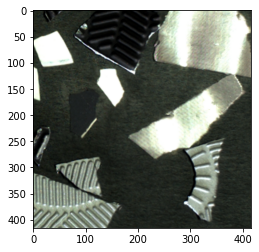

In [13]:
image = sample['image']
ins = sample['instance']
print(type(image),image.shape)
print(type(ins),ins.shape)
print(sample.keys())
plt.imshow(image.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([416, 416, 164])
tensor([[[0.1836, 0.1836, 0.1818,  ..., 0.0507, 0.0555, 0.0571],
         [0.1719, 0.1719, 0.1701,  ..., 0.0494, 0.0543, 0.0559],
         [0.1589, 0.1589, 0.1571,  ..., 0.0479, 0.0530, 0.0547],
         ...,
         [0.2662, 0.2662, 0.2630,  ..., 0.0484, 0.0477, 0.0477],
         [0.2542, 0.2542, 0.2512,  ..., 0.0457, 0.0450, 0.0450],
         [0.2442, 0.2442, 0.2414,  ..., 0.0434, 0.0427, 0.0427]],

        [[0.1741, 0.1741, 0.1723,  ..., 0.0490, 0.0545, 0.0563],
         [0.1642, 0.1642, 0.1624,  ..., 0.0480, 0.0536, 0.0554],
         [0.1524, 0.1524, 0.1505,  ..., 0.0468, 0.0525, 0.0543],
         ...,
         [0.2732, 0.2732, 0.2700,  ..., 0.0495, 0.0489, 0.0489],
         [0.2618, 0.2618, 0.2588,  ..., 0.0467, 0.0460, 0.0460],
         [0.2524, 0.2524, 0.2496,  ..., 0.0444, 0.0437, 0.0437]],

        [[0.1681, 0.1681, 0.1662,  ..., 0.0479, 0.0539, 0.0558],
         [0.1582, 0.1582, 0.1564,  ..., 0.0469, 0.0530, 0.0549],
         [0.1456, 0.1456, 0.14

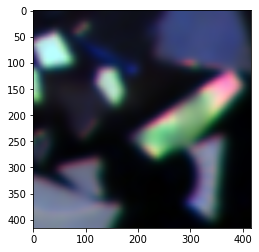

In [14]:
hs = sample['hs'].permute(1,2,0)
print(hs.shape)
plt.imshow(hs[...,(80,50,30)])
print(hs)